In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import cv2
import os
import numpy as np

dataset_path = '/content/drive/MyDrive/lane_dataset/'

images = []
labels = []

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))
        image = image / 255.0
        images.append(image)
        labels.append(class_name)

labels = np.array(labels)
images = np.array(images)
train_images = images[0:160]
test_images = images[160:]
train_labels = labels[0:160]
test_labels = labels[160:]

In [3]:
print(len(images))
print(len(labels))

200
200


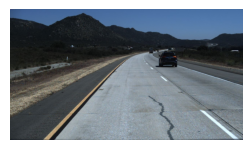

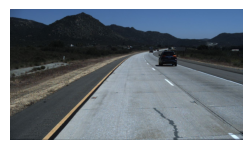

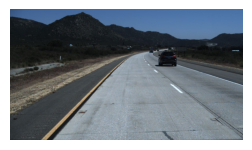

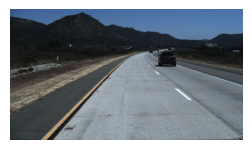

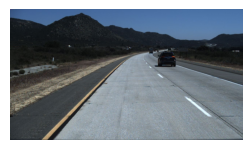

In [16]:
from PIL import Image
path = "/content/drive/MyDrive/lane_dataset/11/"

for i in range(1,6):
    plt.figure(figsize=(3,3))
    image = Image.open(path + str(i) + ".jpg")
    plt.imshow(image)
    plt.grid(True)
    plt.axis('off')
    plt.show()

In [17]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

images = images.astype('float32')
images /= 255.0

from keras.utils import to_categorical
labels = to_categorical(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (200, 32, 32, 3)
Labels shape: (200,)
Images shape: (200, 32, 32, 3)
Labels shape: (200, 21)


In [19]:
import numpy as np
import pickle
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

input_shape = (720, 1280, 3)
pool_size = (2, 2)
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(UpSampling2D(size=pool_size))
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.2))
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))
model.add(UpSampling2D(size=pool_size))
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))
model.add(UpSampling2D(size=pool_size))
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
history = model.fit(images, labels, validation_split=0.2, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 99ms/step - loss: 3.0232 - accuracy: 0.0812 - val_loss: 3.1071 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 52ms/step - loss: 2.8368 - accuracy: 0.1250 - val_loss: 3.5373 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 50ms/step - loss: 2.3831 - accuracy: 0.1125 - val_loss: 6.0986 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 51ms/step - loss: 2.1888 - accuracy: 0.1250 - val_loss: 8.6402 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 60ms/step - loss: 2.1325 - accuracy: 0.1125 - val_loss: 10.2176 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 50ms/step - loss: 2.1316 - accuracy: 0.1063 - val_loss: 10.4735 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 50ms/step - loss: 2.1154 - accuracy: 0.1000 - val_loss: 9.9772 - val_accuracy: 0.0000e+

In [ ]:
model.summary()

Model: "sequential_2"
 _________________________________________________________________
  Layer (type)                Output Shape              Param #   
  batch_normalization_1 (Bat  (None, 80, 160, 3)        12        
  chNormalization)                                                
                                                                  
  Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                  
  Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                  
  max_pooling2d_1 (MaxPoolin  (None, 38, 78, 16)        0         
  g2D)                                                            
                                                                  
  Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                  
  dropout_1 (Dropout)         (None, 36,

In [ ]:
model.save('model.h5')

#DEPLOYMENT

In [21]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [22]:
!pip install scipy==1.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


In [23]:
import numpy as np
import cv2
from scipy.ndimage import zoom
from moviepy.editor import VideoFileClip
from tensorflow import keras

In [24]:
model = keras.models.load_model("/content/drive/MyDrive/model.h5")

In [25]:
class Lanes():
  def __init__(self):
    self.recent_fit=[]
    self.avg_fit=[]

def road_lines(image):
    new_height, new_width = 80, 160
    small_img = zoom(image, (new_height / image.shape[0], new_width / image.shape[1], 1))

    small_img = np.array(small_img)
    small_img = small_img[None, :, :, :]

    prediction = model.predict(small_img)[0] * 255

    lanes.recent_fit.append(prediction)

    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis=0)

    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    new_height, new_width = 720, 1280
    lane_drawn_resized = zoom(lane_drawn, (new_height / lane_drawn.shape[0], new_width / lane_drawn.shape[1], 1))

    lane_drawn_resized = lane_drawn_resized.astype(image.dtype)

    image = image.astype(lane_drawn_resized.dtype)

    result = cv2.addWeighted(image, 1, lane_drawn_resized, 1, 0)

    return result

In [28]:
def deploy_code(path):
    #ouput = "/content/lanes_output_video.mp4"
    #return output
    vid_input = VideoFileClip(path) #"/content/drive/MyDrive/lanes_clip.mp4"
    vid_output = 'lane_output_video.mp4'
    lanes = Lanes()
    vid_clip = vid_input.fl_image(road_lines)
    vid_clip.write_videofile(vid_output)
    return vid_output

In [29]:
import h5py
import tensorflow as tf

file_path = '/content/drive/MyDrive/model.h5'
model = tf.keras.models.load_model(file_path)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 80, 160, 3)        12        
 chNormalization)                                                
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 78, 16)        0         
 g2D)                                                            
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout_1 (Dropout)         (None, 36, 76, 16)       

In [31]:
!pip install -q gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.6 MB/s eta 0:00:00
   ━

In [32]:
import gradio as gr
def process_video(input_video):
    #output_video = deploy_code(input_video)
    output_video = "/content/lanes_output_video.mp4"
    return output_video

iface = gr.Interface(fn=process_video, inputs=gr.inputs.Video(label="Input Video"), outputs="video")
iface.launch()

  iface = gr.Interface(fn=process_video, inputs=gr.inputs.Video(label="Input Video"), outputs="video")

  iface = gr.Interface(fn=process_video, inputs=gr.inputs.Video(label="Input Video"), outputs="video")



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0fe34f3e4e498988af.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
